In [64]:
import numpy as np 
import pandas as pd 
import pymysql
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances



In [ ]:
# This method takes the database connection.
conn = pymysql.connect(host='localhost', port=int(3306), user='yabaconsultoria', passwd='yaba2389', db="livedwine",
                           charset='utf8')

In [ ]:
# Import wines dataset
wines = pd.read_sql_query(
        "SELECT wine_id, alcohol_content, country, harvest, wine_name, producer, region, service, type, volume, (SELECT GROUP_CONCAT(wine_grape.grape separator ', ') from wine_grape where wine_id = wine.wine_id) as grape, (SELECT GROUP_CONCAT(wine_harmonization.harmonization separator ', ') from wine_harmonization where wine_id = wine.wine_id) as harmonization FROM wine",
        conn)
wines.head()

In [ ]:
# Import matrix dataset
ratings = pd.read_sql_query("SELECT * FROM rating", conn)
ratings.head()

In [ ]:
# Merge wine dataset with matrix dataset
conn.close()
df = pd.merge(wines, ratings)
df.head()

In [71]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4929 entries, 0 to 4928
Data columns (total 15 columns):
wine_id            4929 non-null int64
wine_name          4929 non-null object
type               4929 non-null object
country            4929 non-null object
region             4929 non-null object
alcohol_content    4929 non-null object
producer           4929 non-null object
service            4929 non-null int64
volume             4929 non-null int64
grape              4876 non-null object
harvest            4929 non-null object
harmonization      4929 non-null object
image              4929 non-null object
user_id            4929 non-null int64
rating             4929 non-null int64
dtypes: int64(5), object(10)
memory usage: 616.1+ KB


In [72]:
# Average wine ratings
wines_stats = df.groupby('wine_name').agg({'rating': [np.size, np.mean]})
wines_stats.head()

rating          
                                                     size      mean
wine_name                                                          
Abadia del Roble White La Mancha D.O                   29  2.379310
Alqueve Branco 2017                                    23  2.608696
Altivo Vineyard Selection La Rioja Torrontes 2018      25  2.560000
Anciano 35 Years Old Vines Garnacha Calatayud D...     34  2.352941
Anciano Crianza 3 years Tempranillo Valdepeñas ...     40  2.575000

In [73]:
# Filters the statistical dataset with wines that have more than x analyzes.
min_10 = wines_stats['rating']['size'] >= 2.5
wines_stats[min_10].sort_values([('rating', 'mean')], ascending = False).head(10)

rating          
                                                     size      mean
wine_name                                                          
Miliasso Primitivo di Manduria DOC 2017                34  3.235294
Fantinel Eclisse La Roncaia I.G.T. Venezia Giul...     25  3.120000
Rose Confidentielle 2017                               30  3.100000
El Bautismo El Criollo Rosado 2018                     25  3.080000
Pueblo del Sol Reserva Chardonnay 2018                 28  3.071429
Barranc del Rei D.O.P. Valencia Blanco 2017            29  3.068966
Pinhal da Torre Late Harvest Tardio 2010 500 ml        30  3.066667
Vila Vita Branco 2016                                  23  3.043478
Pegaso Verdejo 2018                                    25  3.040000
Expedicion Single Vineyard Selection Cabernet S...     33  3.030303

Text(0.5, 0, 'Rating')

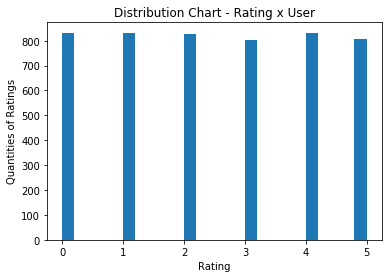

In [74]:
# Distribution Chart - Rating x User
ratings.rating.plot.hist(bins = 25)
plt.title('Distribution Chart - Rating x User')
plt.ylabel('Quantities of Ratings')
plt.xlabel('Rating')

In [75]:
# Pivo Table
matrix = ratings.pivot_table(index = ['wine_id'], columns = ['user_id'], values =  ['rating']).reset_index(drop = True)
matrix.fillna( 0, inplace = True )
matrix.head()

rating                                               ...            \
user_id   1    2    3    4    5    6    7    8    9    10    ... 991  992    
0          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

                                                 
user_id 993  994  995  996  997  998  999  1000  
0        0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0  

[5 rows x 991 columns]

In [76]:
# Calculate Cosine Similarity
wine_similarity = 1 - pairwise_distances(matrix.to_numpy(), metric = 'cosine')
np.fill_diagonal(wine_similarity, 0)
matrix = pd.DataFrame(wine_similarity)
matrix.head()


,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,0.000000,0.087221,0.000000,0.000000,0.000000,0.0,0.007888,0.000000,0.088768,0.000000,...,0.016878,0.000000,0.000000,0.056491,0.000000,0.067948,0.006965,0.036606,0.04361,0.000000
1,0.087221,0.000000,0.000000,0.039728,0.017270,0.0,0.000000,0.034405,0.067289,0.000000,...,0.021990,0.000000,0.105579,0.000000,0.000000,0.070821,0.000000,0.000000,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.023313,0.000000,0.0,0.040203,0.010095,0.102828,0.035721,...,0.000000,0.000000,0.013768,0.000000,0.000000,0.025974,0.000000,0.053308,0.00000,0.000000
3,0.000000,0.039728,0.023313,0.000000,0.075471,0.0,0.000000,0.012028,0.000000,0.053204,...,0.000000,0.000000,0.012304,0.003431,0.011785,0.038687,0.063449,0.000000,0.00000,0.014398
4,0.000000,0.017270,0.000000,0.075471,0.000000,0.0,0.053102,0.000000,0.000000,0.000000,...,0.000000,0.011147,0.000000,0.026845,0.000000,0.000000,0.000000,0.103546,0.00000,0.015647


In [83]:
# Recommendation System
try:
    wine_key = input("Digite o de um vinho existente na database: ")    
    wine = wines[wines['wine_name'] == wine_key].index.tolist()
    wine = wine[0]
    
    wines['similarity'] = matrix.iloc[wine]
    wines.drop_duplicates('wine_id')
    wines.columns = ['wine_id', 'wine_name', 'type', 'country', 'region', 'alcohol_content', 'producer', 'service', 'volume', 'grape', 'harvest', 'harmonization', 'image', 'similatiry']
    wines.head()
except:
    print("Vinho não localizado.")
     
    

Vinho não localizado.


In [84]:
print("Vinhos recomendados com base na sua escolha de ", wine_key)
result = pd.DataFrame(wines.sort_values(['similarity'], ascending = False))
result

Vinhos recomendados com base na sua escolha de  Anciano Gran Reserva 10 years Valdepeñas D.O. 2007


,wine_id,wine_name,type,country,region,alcohol_content,producer,service,volume,grape,harvest,harmonization,image,similatiry,similarity
154,155,Sovento Chardonnay 2018,Branco,Espanha,Castilla-La Mancha,"11,5",Bodegas Fernando Castro,7,750,Chardonnay,2018,"Salmao, peixes com molho, aves",Sovento Chardonnay 2018,0.000000,0.162467
167,168,Protos Rose 2017,Rose,Espanha,Ribeira del Duero,"13,0",Protos,10,750,Tempranillo,2017,"Posta de atum grelhada com crosta de gergelim,...",Protos Rose 2017,0.000000,0.158101
86,87,Madame Veuve Point Pinot Noir Bourgogne AOP 2016,Tinto,França,Borgonha,"12,5",Madame Veuve Point,12,750,Pinot Noir,2016,None,Madame Veuve Point Pinot Noir Bourgogne AOP 2016,0.000000,0.151602
163,164,El Bautismo El Criollo Rosado 2018,Rose,Argentina,Mendonza,"13,5",La Liga de Enologos,9,750,Criolla,2018,"Camarão empanado, talharim com molho rosé, ris...",El Bautismo El Criollo Rosado 2018,0.000000,0.117926
132,133,Tierra del Mar Tannat Tinto 2018,Tinto,Uruguai,Canelones,"13,0",Aurora Uruguai,17,750,Tannat,2018,"Churrasco, carnes grelhadas",Tierra del Mar Tannat Tinto 2018,0.053798,0.096793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,177,Palafitos de Mar Semi Sweet Rose Cabernet Sauv...,Rose,Chile,Valle Central,"12,5",Wine,14,750,"Syrah, Cabernet Sauvignon",2019,"Comida japonesa, salmão grelhado com legumes, ...",Palafitos de Mar Semi Sweet Rose Cabernet Sauv...,NaN,NaN
177,178,Enclos du Wine Hunter A.O.C. Bordeaux Rose 2018,Rose,França,Bordeaux,"12,5",Enclos du Winter Hunter,7,750,Varias uvas,2018,Salada de brotos com cogumelos refogados com t...,Enclos du Wine Hunter A.O.C. Bordeaux Rose 2018,NaN,NaN
178,179,Altivo Classic Rose 2018,Rose,Argentina,Mendonza,"13,0",Finca Eugenio Bustos,8,750,Malbec,2018,"Arroz de camarão, quiche lorraine, nhoque ao s...",Altivo Classic Rose 2018,NaN,NaN
179,180,Urmeneta Rose 2018,Rose,Chile,Valle Central,"12,0",Urmeneta,8,750,"Cabernet Sauvignon, Merlot",2018,"Espetinho de camarão, saladas, espaguete prima...",Urmeneta Rose 2018,NaN,NaN
